**Общая информация**

**Срок сдачи:** 21 октября 2019, 08:30 

**Штраф за опоздание:** по 0.5 балла за 24 часа задержки. Через 10 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0919, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.sparse import csr_matrix

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata, fetch_20newsgroups

from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction import DictVectorizer
#%load_ext pycodestyle_magic

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

In [2]:
#%%pycodestyle

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n = n_neighbors
        self.alg = algorithm
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes = y.max()
        if(self.alg == 'kd_tree'):
            self.clf = KDTree(X, leaf_size = 10)
    def predict(self, X):
        return self.predict_proba(X).argmax(axis = 1)
    
    def predict_proba(self, X):
        if(self.alg == 'brute'):
            ind = cdist(X, self.X).argsort(axis = 1)[:,:self.n]
        if(self.alg == 'kd_tree'):
            dist, ind = self.clf.query(X, k = self.n)
        ver = np.zeros((X.shape[0], self.classes + 1))
        for i in range(X.shape[0]):
            pp = np.bincount(self.y[ind[i]], minlength = self.classes + 1)
            ver[i] = np.array(pp)
        ver /= self.classes
        return ver
        
            
    def score(self, X, y):
        return (self.predict(X) == y).sum() / y.shape[0]

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [8]:
assert abs(my_clf.score(X_test, y_test) - clf.score(X_test,y_test))<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict и predict_proba сравнимой со sklearn для iris.
Для этого используем numpy

In [9]:
%time clf.fit(X_train, y_train)

Wall time: 984 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [10]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [11]:
%time clf.predict(X_test)

Wall time: 998 µs


array([0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1])

In [12]:
%time my_clf.predict(X_test)

Wall time: 997 µs


array([0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1], dtype=int64)

In [13]:
%time clf.predict_proba(X_test)

Wall time: 2 ms


array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ]])

In [14]:
%time my_clf.predict_proba(X_test)

Wall time: 997 µs


array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ]])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris.
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

In [15]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [17]:
%time clf.fit(X_train, y_train)

Wall time: 18.9 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [18]:
%time my_clf.fit(X_train, y_train)

Wall time: 997 µs


In [19]:
%time clf.predict(X_test)

Wall time: 1.99 ms


array([1, 0, 2, 0, 0, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1])

In [20]:
%time my_clf.predict(X_test)

Wall time: 0 ns


array([1, 0, 2, 0, 0, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1], dtype=int64)

In [21]:
%time clf.predict_proba(X_test)

Wall time: 998 µs


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [22]:
%time my_clf.predict_proba(X_test)

Wall time: 998 µs


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [23]:
assert abs(my_clf.score(X_test, y_test) - clf.score(X_test,y_test))<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [24]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [25]:
data = newsgroups['data']
target = newsgroups['target']

Переведите во всех документах все буквы в нижний регистр и замените во всех документах символы, не
являющиеся буквами и цифрами, на пробелы. Далее разбейте текста по пробельным символам на токены(термы/слова). Удалите текста, содержащие только пробелы.

In [26]:
def filter_tokens(data, target):
    data_tok = []
    new_target = []
    for i in range(len(data)):
        ss = ''.join([x.lower() if ('a' <= x.lower() <= 'z') else ' ' for x in data[i]]).split(' ')
        temp = list(filter(lambda a: a.isalnum() and len(a) > 0, ss))
        if(len(temp) > 0):
            data_tok.append(temp)
            new_target.append(target[i])
    return data_tok, new_target
# data_tok should be a list of lists of tokens for each line in data.

In [27]:
data_tok, target_tok = filter_tokens(data, target)

In [28]:
assert all(isinstance(row, (list, tuple)) for row in data_tok), "please convert each line into a list of tokens (strings)"
assert all(all(isinstance(tok, str) for tok in row) for row in data_tok), "please convert each line into a list of tokens (strings)"
is_latin = lambda tok: all('a' <= x.lower() <= 'z' for x in tok)
assert all(map(lambda l: not is_latin(l) or l.islower() , map(' '.join, data_tok))), "please make sure that you lowercase the data and drop spaced texts"

Преобразуйте датасет в разреженную матрицу scipy.sparse.csr_matrix, где значение x в позиции (i, j)
означает, что в документе i слово j встретилось x раз

In [29]:
def data_to_dic(data):
    text_dic = []
    for i in data:
        temp_dic = {}
        for word in i:
            if(word in text_dic):
                temp_dic[word] += 1
            else:
                temp_dic[word] = 1
        text_dic.append(temp_dic)
    return text_dic

In [31]:
text_dic = data_to_dic(data_tok)
vv = DictVectorizer()
matr = vv.fit_transform(text_dic)
matr.shape, len(target_tok)

((11004, 72942), 11004)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [32]:
matr.size

1077876

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальный score в среднем на валидации на 3 фолдах).
Постройте график зависимости среднего score от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [33]:
def get_cv(X, y, metr = 'euclidean', use_idf = False):
    res = []
    for i in range(1, 30):
        temp_score = 0
        if(use_idf):
            X = TfidfTransformer().fit_transform(X)
        clf = KNeighborsClassifier(n_neighbors=i, metric=metr)
        clf_res = cross_validate(clf, X, y, cv = 3)
        res.append(clf_res)
    return res

In [34]:
scores1 = get_cv(matr, target_tok)
scores2 = get_cv(matr, target_tok, metr = 'cosine')
scores3 = get_cv(matr, target_tok, use_idf = True)
scores4 = get_cv(matr, target_tok, metr = 'cosine', use_idf = True)

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


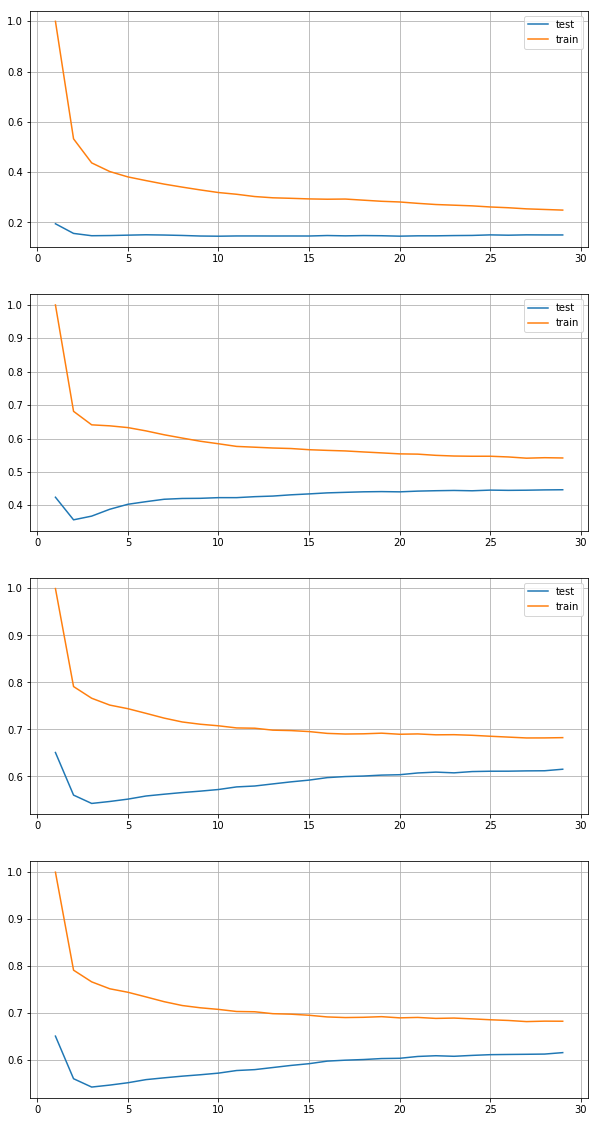

In [35]:
fig = plt.figure(figsize= (10, 20))
ax1 = fig.add_subplot(411)
ax1.plot(range(1, 30), [i['test_score'].mean() for i in scores1], label = 'test')
ax1.plot(range(1, 30), [i['train_score'].mean() for i in scores1], label = 'train')
ax1.grid()
ax1.legend()
ax2 = fig.add_subplot(412)
ax2.plot(range(1, 30), [i['test_score'].mean() for i in scores2], label = 'test')
ax2.plot(range(1, 30), [i['train_score'].mean() for i in scores2], label = 'train')
ax2.grid()
ax2.legend()
ax3 = fig.add_subplot(413)
ax3.plot(range(1, 30), [i['test_score'].mean() for i in scores3], label = 'test')
ax3.plot(range(1, 30), [i['train_score'].mean() for i in scores3], label = 'train')
ax3.grid()
ax3.legend()
ax4 = fig.add_subplot(414)
ax4.plot(range(1, 30), [i['test_score'].mean() for i in scores4], label = 'test')
ax4.plot(range(1, 30), [i['train_score'].mean() for i in scores4], label = 'train')
ax4.grid()
ax3.legend()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf преобразование( sklearn.feature_extraction.text.TfidfTransformer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [36]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])
test_data = newsgroups['data']
test_target = newsgroups['target']

Оценим качество(score) вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [37]:
test_data_tok, test_target_tok = filter_tokens(test_data, test_target)
test_text_dic = data_to_dic(test_data_tok)
test_matr = vv.transform(test_text_dic)
test_matr.shape, len(test_target_tok)

((7307, 72942), 7307)

In [41]:
test_idf = TfidfTransformer().fit_transform(test_matr)
matr_idf = TfidfTransformer().fit_transform(matr)
best_clf = KNeighborsClassifier(n_neighbors=20, metric='cosine').fit(matr_idf, target_tok)
best_clf.score(test_idf, test_target_tok)

0.6567674832352539

score на тесте немного больше, чем в кросс-валидации. Мне кажется это из-за разности объемов обучающей выборки. На графике можно увидеть что score особо не меняется при кол-ве соседей 15+.